### import important python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
import plotly.express as px

### import the needed NLTK modules

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
MH=pd.read_excel("C:\\Users\\omowaye\\Desktop\\python project\\mental health prediction from social media post\\mental_health.xlsx")
MH.head(5)

#mh=pd.read_excel('C:\\Users\\omowaye\\Desktop\\masters\\mental_health\\Combined Data\\mental_health2.xlsx')


Unnamed: 0                                          statement   status
0          0                                         oh my gosh  Anxiety
1          1  trouble sleeping, confused mind, restless hear...  Anxiety
2          2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3          3  I've shifted my focus to something else but I'...  Anxiety
4          4  I'm restless and restless, it's been a month n...  Anxiety

##### Display basic information

In [5]:
MH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53044 non-null  object
 1   statement   52664 non-null  object
 2   status      53042 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [6]:
MH['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', nan, 'Stress',
       'Bipolar', 'Personality disorder'], dtype=object)

In [7]:
MH['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10652
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

#### Data Cleaning and Preprocessing

In [8]:
# checking to see the shape of the dataset before cleaning
MH.shape

(53044, 3)

In [9]:
# checking for null values
MH.isnull().sum()

Unnamed: 0      0
statement     380
status          2
dtype: int64

In [10]:
'''since the statement columns are actual statement made from human suffering from a mental health challenge we cant just assume what the person is
trying to say, therefore the best is to drop all the empty statement rows and also since the empty columns are 380 it won't have a great impact
if we drop/delete them '''

MH.dropna(axis=0,inplace=True)

In [11]:
#drop the 	Unnamed: 0 column
MH=MH.drop(columns= ['Unnamed: 0'])
MH.head(2)

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety

In [12]:
# checking to see the shape of the dataset after cleaning
MH.shape

(52663, 2)

In [13]:
# verify to confirm there are no empty rows
MH.isnull().sum()

statement    0
status       0
dtype: int64

## lets define a function to clean the text data, We are going to perform the following operations
1. remove all the stop words
2. case conversion- convert all the  patient statement in the dataser to a uniform case(either upper or lower case; anyone of the two)
3. tokenize each statment so we can be able to perform other operation e.g POS tagging, lemmitization
4. lemmatize 

In [14]:
def preprocess_text(text):
    """
    Preprocess the input text by converting to lowercase, removing punctuation,
    tokenizing, removing stopwords, and lemmatizing the words.
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text into words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return the preprocessed text as a single string
    return " ".join(tokens) 

#### Apply the preprocessing function to the "statement" column

In [15]:
# we convert all our statment to string as there maybe numbers there, if we dont it will throw an error when we execute if non-strings are present
MH['statement']=MH['statement'].astype(str)
MH['cleaned_statement'] = MH['statement'].apply(preprocess_text)

# Display the first few preprocessed statements
print("\nPreprocessed Statements:")
print(MH[['statement', 'cleaned_statement']].head())


Preprocessed Statements:
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  


In [16]:
#print the first 10 rows to see the difference between the cleaned and uncleaned statement column
MH.head(10)

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   
5  every break, you must be nervous, like somethi...  Anxiety   
6  I feel scared, anxious, what can I do? And may...  Anxiety   
7    Have you ever felt nervous but didn't know why?  Anxiety   
8  I haven't slept well for 2 days, it's like I'm...  Anxiety   
9                 I'm really worried, I want to cry.  Anxiety   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ...  
6         feel scared anxious may family u protected  
7                       ever felt nervous didnt know  
8       havent slept well 2 day like im restless huh  
9                         im really worried want cry

In [17]:
#Lets get rid of the old statment column since we dont need it again

MH=MH.drop(columns= ['statement'])
MH.head()

status                                  cleaned_statement
0  Anxiety                                            oh gosh
1  Anxiety  trouble sleeping confused mind restless heart ...
2  Anxiety  wrong back dear forward doubt stay restless re...
3  Anxiety  ive shifted focus something else im still worried
4  Anxiety                im restless restless month boy mean

## Visualization

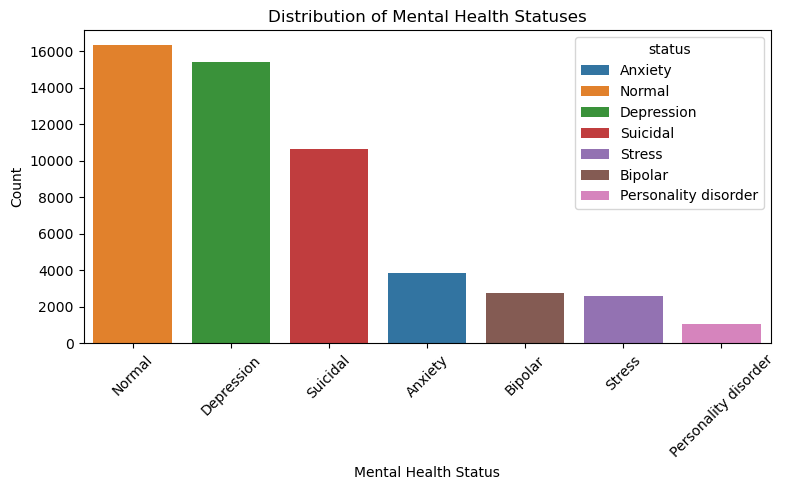

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=MH, x='status', order=MH['status'].value_counts().index,hue='status',legend='brief')
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
plot_data=MH['status'].value_counts().reset_index()
plot_data.columns= ['status','count']

# do this to add percentage 
total=plot_data['count'].sum()
#plot_data['percentage']

a=px.bar(plot_data,
    x='status',
    y='count',
    color='status',
    title='<b> Distribution of Mental Health Statuses <b>',
    labels= {'count':'Number Of Statements'},
    width=1000,
    height=500)

a.show()
#a.show(renderer='browser')

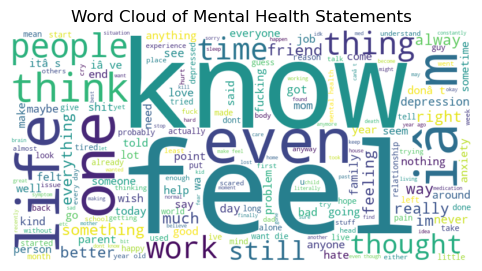

In [20]:
# Generating a WordCloud for the cleaned statement

all_text = " ".join(MH['cleaned_statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Mental Health Statements")
plt.axis("off")
plt.show()

# Sentiment Analysis Using NLTK's VADER
VADER helps to analyze text polarity (positive, negative, neutral) in users statement.

In [21]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score from VADER
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound'] #Return the compound sentiment score for the given text.

# Apply the sentiment analysis function to the preprocessed statements
MH['sentiment_score'] = MH['cleaned_statement'].apply(get_sentiment)

# Display the first few sentiment scores along with their corresponding status
print("\nSentiment Scores:")
print(MH[['cleaned_statement', 'status', 'sentiment_score']].head())



Sentiment Scores:
                                   cleaned_statement   status  sentiment_score
0                                            oh gosh  Anxiety           0.0000
1  trouble sleeping confused mind restless heart ...  Anxiety          -0.7269
2  wrong back dear forward doubt stay restless re...  Anxiety          -0.7351
3  ive shifted focus something else im still worried  Anxiety          -0.2960
4                im restless restless month boy mean  Anxiety          -0.4939


In [22]:
MH.head(10)

status                                  cleaned_statement  sentiment_score
0  Anxiety                                            oh gosh           0.0000
1  Anxiety  trouble sleeping confused mind restless heart ...          -0.7269
2  Anxiety  wrong back dear forward doubt stay restless re...          -0.7351
3  Anxiety  ive shifted focus something else im still worried          -0.2960
4  Anxiety                im restless restless month boy mean          -0.4939
5  Anxiety  every break must nervous like something wrong ...          -0.4019
6  Anxiety         feel scared anxious may family u protected          -0.2500
7  Anxiety                       ever felt nervous didnt know          -0.2732
8  Anxiety       havent slept well 2 day like im restless huh          -0.1063
9  Anxiety                         im really worried want cry          -0.6461

### Plot the distribution of compound sentiment scores

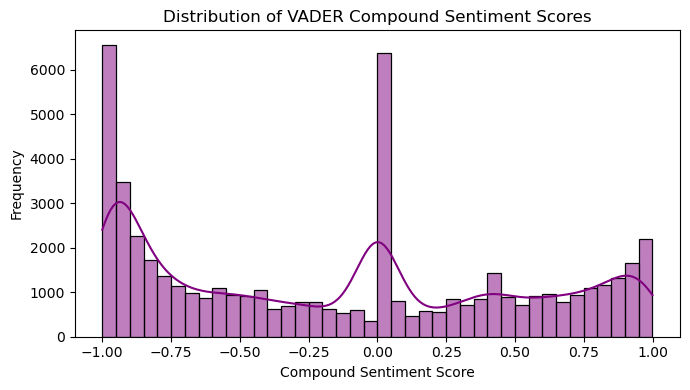

In [23]:

plt.figure(figsize=(7, 4))
sns.histplot(MH['sentiment_score'], bins=40, kde=True, color='purple')
plt.title("Distribution of VADER Compound Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [24]:
his=px.histogram(data_frame=MH,
    x='sentiment_score',
    color=None,
   
    
    labels='compound sentiment score',
    orientation=None,
    barmode='relative',
    nbins=20,
    title='Distribution of Compound Sentiment Score',
    width=800,
    height=500)
his.show()

### Compare sentiment scores across different mental health statuses

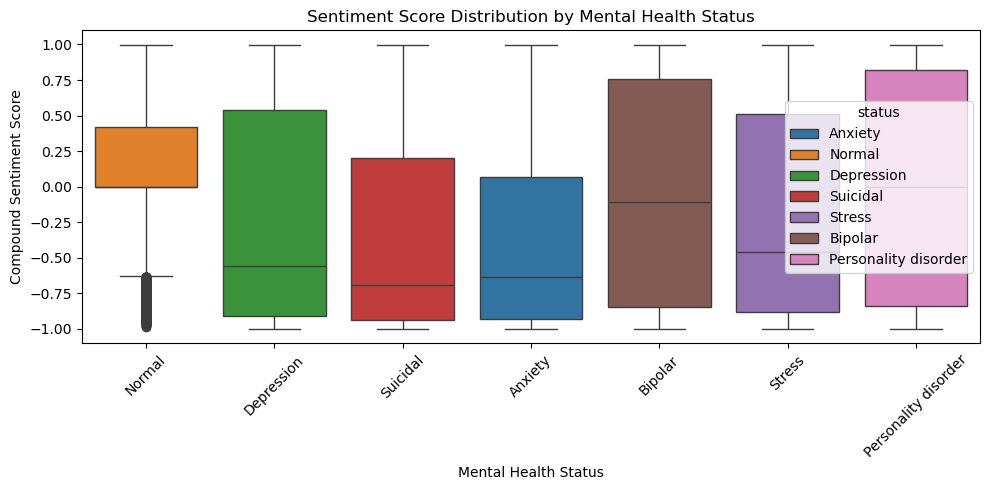

In [25]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=MH, x='status', y='sentiment_score', order=MH['status'].value_counts().index,hue='status',legend='full')
plt.title("Sentiment Score Distribution by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word Frequency & N-gram Analysis
This help us to examines frequent word patterns in different mental health categories. To do so we can group the words into one ,two or three or four and see which occurs the most. if we group or count by one it may not make much of a sense as it wont be different from when we are tokenizing. so a grouping of two upward is still a bit meaningful

In [26]:
from collections import Counter
from nltk.util import ngrams

# Unigram Analysis: Tokenize each clean statement into words and collect them
all_tokens = []
for text in MH['cleaned_statement']:
    tokens = text.split()  # Simple whitespace tokenization
    unigram_in_text=list(ngrams(tokens,1))
    all_tokens.extend(unigram_in_text)

# Count frequency of each unigram using Counter
unigram_counts = Counter(all_tokens)
top_unigrams = unigram_counts.most_common(10)
print("Top 10 Unigrams:")
print(top_unigrams)
print('\n')

# Bigram Analysis: Generate and count two-word sequences (bigrams)
all_bigrams = []
for text in MH['cleaned_statement']:
    tokens = text.split()
    bigrams_in_text = list(ngrams(tokens, 2))
    all_bigrams.extend(bigrams_in_text)

bigram_counts = Counter(all_bigrams)
top_bigrams = bigram_counts.most_common(10)
print("Top 10 Bigrams:")
print(top_bigrams)
print('\n')

# Trigram Analysis: Generate and count three-word sequences (trigrams)
all_trigrams = []
for text in MH['cleaned_statement']:
    tokens = text.split()
    trigrams_in_text = list(ngrams(tokens, 3))
    all_trigrams.extend(trigrams_in_text)

trigram_counts = Counter(all_trigrams)
top_trigrams = trigram_counts.most_common(10)
print("Top 10 Trigrams:")
print(top_trigrams)
print('\n')

# Quadgram Analysis: Generate and count four-word sequences (quadgrams)
all_quadgrams = []
for text in MH['cleaned_statement']:
    tokens = text.split()
    quadgrams_in_text = list(ngrams(tokens, 4))
    all_quadgrams.extend(quadgrams_in_text)

quadgram_counts = Counter(all_quadgrams)
top_quadgrams = quadgram_counts.most_common(10)
print("Top 10 quadgrams:")
print(top_quadgrams)

Top 10 Unigrams:
[(('like',), 38552), (('feel',), 35625), (('want',), 28713), (('know',), 24423), (('get',), 23243), (('life',), 23193), (('time',), 21238), (('even',), 18712), (('people',), 16853), (('would',), 16797)]


Top 10 Bigrams:
[(('feel', 'like'), 13732), (('want', 'die'), 2173), (('get', 'better'), 1861), (('year', 'old'), 1801), (('mental', 'health'), 1783), (('even', 'though'), 1741), (('every', 'day'), 1739), (('anyone', 'else'), 1736), (('make', 'feel'), 1688), (('year', 'ago'), 1608)]


Top 10 Trigrams:
[(('want', 'die', 'want'), 468), (('feel', 'like', 'im'), 413), (('make', 'feel', 'like'), 362), (('every', 'single', 'day'), 305), (('take', 'anymore', 'take'), 302), (('anymore', 'take', 'anymore'), 301), (('feel', 'like', 'shit'), 297), (('die', 'want', 'die'), 278), (('feel', 'like', 'iâ€™m'), 262), (('feel', 'like', 'going'), 234)]


Top 10 quadgrams:
[(('take', 'anymore', 'take', 'anymore'), 299), (('anymore', 'take', 'anymore', 'take'), 298), (('want', 'die', 'wan

# Topic Modeling using LDA
We use Latent Dirichlet Allocation (LDA) to uncover hidden themes in the users statement.


*1. train the LDA model on the entire dataset and print out the output*

*2. print out the top words in each topic*
   
*3. check through the list of words in each topics and use that to assign a manual label to each topic*

In [27]:
import re
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Additional preprocessing for LDA
def lda_preprocess(text):
    try:
        # Handle contractions and encoding
        text = contractions.fix(str(text))
        # Remove special characters/numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        return text.lower().strip()
    except:
        return 'no_text'

# Apply enhanced preprocessing
MH['lda_cleaned_statement'] = MH['cleaned_statement'].apply(lda_preprocess)

# Handle empty documents
MH['lda_cleaned_statement'] = MH['lda_cleaned_statement'].replace('', 'no_text')

# Custom stopwords as LIST (critical fix)
custom_stopwords = list(set(stopwords.words('english') + [
    'would', 'could', 'also', 'ive', 'im', 'dont', 'like', 'get', 
    'thing', 'something', 'really', 'even', 'maybe', 'still', 'much'
]))

# Safe vectorizer configuration
vectorizer = CountVectorizer(
    max_df=0.90,
    min_df=2,  # Reduced from 10 for safety
    max_features=2000,
    stop_words=custom_stopwords,
    ngram_range=(1,2),
    token_pattern=r'\b[a-zA-Z]{3,}\b'  # Only words >=3 letters
)

# Verify preprocessing
print("Sample cleaned texts:")
print(MH['lda_cleaned_statement'].head(3))

# Check vocabulary
try:
    X = vectorizer.fit_transform(MH['lda_cleaned_statement'])
    print(f"\nVocabulary size: {len(vectorizer.get_feature_names_out())}")
except ValueError as e:
    print(f"Error: {e}")
    print("Try reducing min_df or checking preprocessing")

# Only proceed if vectorization succeeded
if 'X' in locals():
    # Optimized LDA parameters
    lda = LatentDirichletAllocation(
        n_components=8,
        max_iter=50,
        learning_method='online',
        random_state=42,
        batch_size=128,
        learning_offset=50
    )
    
    lda.fit(X)
    
    # Enhanced topic display
    def improved_topics(model, vectorizer, n_words=15):
        terms = vectorizer.get_feature_names_out()
        for idx, topic in enumerate(model.components_):
            total = topic.sum()
            sorted_terms = sorted(
                [(terms[i], topic[i]) for i in topic.argsort()[:-n_words-1:-1]],
                key=lambda x: x[1], 
                reverse=True
            )
            print(f"Topic #{idx+1}:")
            print(" + ".join([f"{weight/total:.2%} {term}" 
                            for term, weight in sorted_terms]))
            print()
    
    print("\nImproved Topics:")
    improved_topics(lda, vectorizer)
    
else:
    print("\nTopic modeling aborted due to vectorization issues")
    

Sample cleaned texts:
0                                              oh gosh
1    trouble sleeping confused mind restless heart ...
2    wrong back dear forward doubt stay restless re...
Name: lda_cleaned_statement, dtype: object

Vocabulary size: 2000

Improved Topics:
Topic #1:
3.99% day + 2.69% back + 2.47% last + 2.20% keep + 2.14% year + 1.95% point + 1.69% anxiety + 1.61% stop + 1.57% got + 1.42% home + 1.42% pain + 1.36% felt + 1.35% start + 1.31% one + 1.30% best

Topic #2:
3.27% life + 3.03% way + 2.82% never + 2.56% see + 2.05% getting + 2.00% live + 1.86% care + 1.77% try + 1.61% one + 1.50% tried + 1.49% people + 1.37% give + 1.32% need + 1.29% happy + 1.26% able

Topic #3:
7.29% feel + 4.80% know + 2.38% friend + 2.35% time + 1.64% better + 1.62% want + 1.59% feeling + 1.59% make + 1.51% going + 1.47% week + 1.45% family + 1.45% anything + 1.36% love + 1.26% talk + 1.23% anymore

Topic #4:
4.45% depression + 3.58% time + 2.82% long + 2.77% anxiety + 2.64% tell + 2.27% take

##  print out the top keywords for each topic

In [28]:
feature_names=vectorizer.get_feature_names_out()

n_top_words= 15
for topic_idx, topic in enumerate(lda.components_):
    top_indices= topic.argsort() [-n_top_words:][::-1]
    top_words=[feature_names[i] for i in top_indices]
    print("Topic {}: {}" .format(topic_idx, " , ".join(top_words)))

Topic 0: day , back , last , keep , year , point , anxiety , stop , got , home , pain , felt , start , one , best
Topic 1: life , way , never , see , getting , live , care , try , one , tried , people , give , need , happy , able
Topic 2: feel , know , friend , time , better , want , feeling , make , going , week , family , anything , love , talk , anymore
Topic 3: depression , time , long , anxiety , tell , take , depressed , going , mom , say , used , working , symptom , talking , dad
Topic 4: want , people , thought , hate , die , everyone , think , every , alone , say , suicide , let , almost , wish , suicidal
Topic 5: life , year , fucking , parent , kill , mental , therapy , health , living , stress , social , issue , many , future , tired
Topic 6: work , month , job , ever , shit , said , went , since , two , told , got , money , ago , mean , attack
Topic 7: anyone , everything , someone , bad , else , school , past , help , find , understand , bipolar , feeling , med , medicati

## assign a label to each extracted topic based on the words in the topics

In [29]:
 # Assign topics i.e assigning labels to each extracted topic
MH['dominant_topic'] = lda.transform(X).argmax(axis=1)
topic_labels = {
        0: "Temporal Patterns & Pain Signals",
        1: "Life Perspectives & Aspirations",
        2: "Interpersonal Relationships & Emotional Support",
        3: "Depressive Symptoms & Familial Impact",
        4: "Suicide & Self-Harm Ideation",
        5: "Crisis & Intense Mental Health Struggles",
        6: "Work Stress & Financial Pressures",
        7: "Bipolar Experiences & Treatment"
    }
MH['topic_label'] = MH['dominant_topic'].map(topic_labels)

## calculate the coherence score for the LDA model

In [30]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Prepare data in Gensim format
tokenized_texts = [text.split() for text in MH['lda_cleaned_statement']]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Get topic words from your sklearn LDA model
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-15:][::-1]  # Get top 15 words per topic
    topics.append([feature_names[i] for i in top_words_idx])

# Calculate coherence
coherence_model = CoherenceModel(
    topics=topics,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print(f"\nCoherence Score: {coherence_score:.3f} (0=bad, 1=perfect)")


Coherence Score: 0.359 (0=bad, 1=perfect)


## *co-herence score for all the extracted topics*

Topic 0 ('Temporal Patterns & Pain Signals'): Coherence = 0.330
Topic 1 ('Life Perspectives & Aspirations'): Coherence = 0.363
Topic 2 ('Interpersonal Relationships & Emotional Support'): Coherence = 0.395
Topic 3 ('Depressive Symptoms & Familial Impact'): Coherence = 0.321
Topic 4 ('Suicide & Self-Harm Ideation'): Coherence = 0.404
Topic 5 ('Crisis & Intense Mental Health Struggles'): Coherence = 0.361
Topic 6 ('Work Stress & Financial Pressures'): Coherence = 0.371
Topic 7 ('Bipolar Experiences & Treatment'): Coherence = 0.329


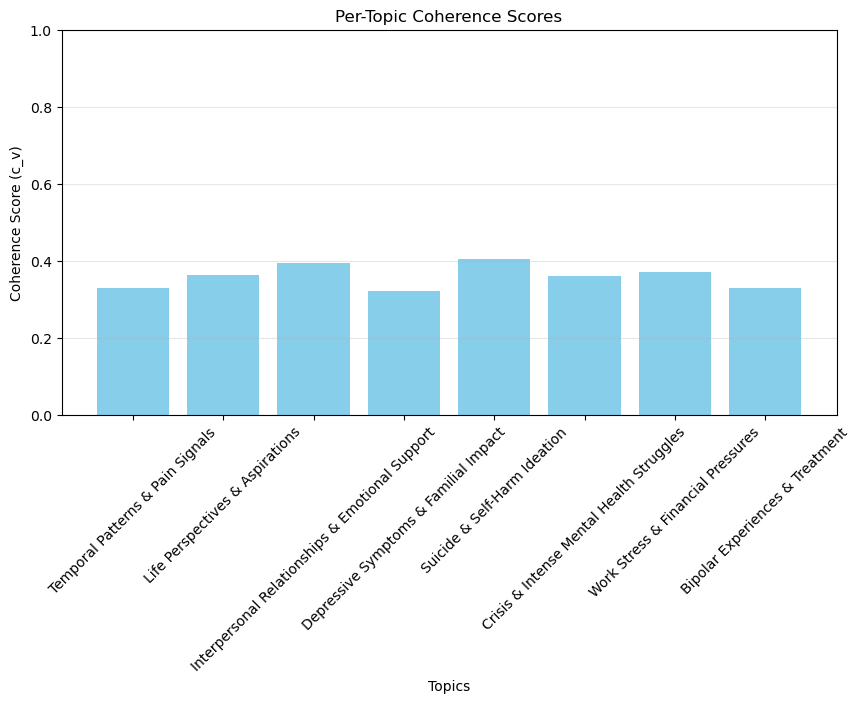

In [31]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

# 1. Prepare data in Gensim format
tokenized_texts = [text.split() for text in MH['lda_cleaned_statement']]
dictionary = Dictionary(tokenized_texts)

# 2. Get top words for each topic (from your sklearn LDA)
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-15:][::-1]  # Top 15 words per topic
    topics.append([feature_names[i] for i in top_words_idx])

# 3. Calculate per-topic coherence
per_topic_coherence = []
for i, topic_words in enumerate(topics):
    # Create a single-topic list for evaluation
    single_topic = [topic_words]
    
    # Calculate coherence for just this topic
    cm = CoherenceModel(
        topics=single_topic,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = cm.get_coherence()
    per_topic_coherence.append(coherence_score)
    print(f"Topic {i} ('{topic_labels[i]}'): Coherence = {coherence_score:.3f}")

# 4. Visualize results
plt.figure(figsize=(10, 5))
plt.bar(range(len(per_topic_coherence)), per_topic_coherence, color='skyblue')
plt.xticks(range(len(per_topic_coherence)), list(topic_labels.values()), rotation=45)
plt.title("Per-Topic Coherence Scores")
plt.xlabel("Topics")
plt.ylabel("Coherence Score (c_v)")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Create a crosstab to show the number of times certain mental health illness appear in the extracted topic

In [32]:
pd.crosstab(MH['status'], MH['topic_label'])

topic_label           Bipolar Experiences & Treatment  \
status                                                  
Anxiety                                           554   
Bipolar                                          1022   
Depression                                        734   
Normal                                           1523   
Personality disorder                              127   
Stress                                            180   
Suicidal                                          216   

topic_label           Crisis & Intense Mental Health Struggles  \
status                                                           
Anxiety                                                    133   
Bipolar                                                    103   
Depression                                                 788   
Normal                                                    1339   
Personality disorder                                        83   
Stress                                                     346   
Suicidal                                                   726   

topic_label           Depressive Symptoms & Familial Impact  \
status                                                        
Anxiety                                                 349   
Bipolar                                                 111   
Depression                                             1124   
Normal                                                 1496   
Personality disorder                                     27   
Stress                                                  143   
Suicidal                                                207   

topic_label           Interpersonal Relationships & Emotional Support  \
status                                                                  
Anxiety                                                           981   
Bipolar                                                           836   
Depression                                                       7394   
Normal                                                           2848   
Personality disorder                                              521   
Stress                                                            958   
Suicidal                                                         4495   

topic_label           Life Perspectives & Aspirations  \
status                                                  
Anxiety                                           231   
Bipolar                                           190   
Depression                                       1746   
Normal                                           2531   
Personality disorder                              143   
Stress                                            244   
Suicidal                                         1621   

topic_label           Suicide & Self-Harm Ideation  \
status                                               
Anxiety                                        148   
Bipolar                                         76   
Depression                                    1743   
Normal                                        1449   
Personality disorder                            77   
Stress                                          81   
Suicidal                                      2334   

topic_label           Temporal Patterns & Pain Signals  \
status                                                   
Anxiety                                           1103   
Bipolar                                            238   
Depression                                        1257   
Normal                                            3300   
Personality disorder                                50   
Stress                                             365   
Suicidal                                           720   

topic_label           Work Stress & Financial Pressures  
status                                                   
Anxiety                  

## Topic distribution across mental health status VISULIZATION

### lets see if plotly can give us better visuals

In [33]:
import plotly.express as px

# 1. construct heatmap_data from your LDA model
n_top_words = 15  # Number of top words to show per topic
topic_words = []
for topic in lda.components_:
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    topic_words.append([vectorizer.get_feature_names_out()[i] for i in top_words_idx])

# Create the heatmap matrix
heatmap_data = pd.DataFrame(
    [topic/np.sum(topic) for topic in lda.components_],
    columns=vectorizer.get_feature_names_out()
).loc[:, [word for words in topic_words for word in words]]

# 2. Create the heatmap
fig = px.imshow(
    heatmap_data.T,
    labels=dict(x="Topic Number", y="Word", color="Importance"),
    color_continuous_scale='YlGnBu',
    title="<b>Topic-Word Importance Heatmap</b><br>How strongly words contribute to each topic (Normalized Weights)",
    width=1000,
    height=800
)
fig.update_layout(
    xaxis_title="Topic Number",
    yaxis_title="Top Words",
    hovermode="closest"
)
fig.show()

In [34]:
topic_dist = pd.crosstab(MH['status'], MH['topic_label'], normalize='index').reset_index()

fig = px.bar(
    topic_dist.melt(id_vars='status'), 
    x='status',
    y='value',
    color='topic_label',
    title="<b>Topic Distribution by Mental Health Status</b><br>Proportion of topics discussed in each status group",
    labels={'value':'Proportion', 'status':'Mental Health Status'},
    width=1000,
    height=500
)
fig.update_layout(barmode='stack',xaxis_tickangle=-45)
fig.show()

In [35]:
import plotly.express as px
import numpy as np

# Create the base heatmap
fig = px.imshow(
    topic_dist.set_index('status'),
    labels=dict(x="Topic", y="Status", color="Proportion"),
    title="<b>Topic Prevalence by Mental Health Status</b><br>How frequently topics appear in each status group",
    color_continuous_scale='YlGnBu',
    width=1000,
    height=800,
    text_auto=".2f"  # This automatically adds formatted values
)

# Custom hover template
fig.update_traces( hovertemplate="<b>Status</b>: %{y}<br><b>Topic</b>: %{x}<br><b>Proportion</b>: %{z:.2f}<extra></extra>" )

# Adjust layout
fig.update_layout(
    xaxis_title="Topic",
    yaxis_title="Mental Health Status",
    font=dict(size=12),
    margin=dict(l=50, r=50, b=100, t=100) )

# Improve text visibility by customizing textfont colors
fig.update_traces( textfont=dict(size=12) )

fig.show()

In [36]:
 import plotly.express as px

# 1. Create the plot_data from your MH DataFrame
plot_data = (
    MH.groupby(['status', 'topic_label'])
    .size()
    .reset_index(name='count'))

# 2. Generate the visualization
fig = px.bar(
    plot_data, 
    x='status', 
    y='count', 
    color='topic_label',
    facet_col='topic_label',
    facet_col_wrap=4,
    height=1000,
    title='<b>Topic-Specific Distribution Across Statuses</b><br><sub>Detailed breakdown of each topic prevalence by mental health category</sub>',
    labels={ 'count': 'Number of Statements',
        'status': 'Mental Health Status',
        'topic_label': 'Topic'} )

# 3. Formatting improvements
fig.update_layout(
    showlegend=False, #i disable legend so that visual will not be too crowded
    margin=dict(t=120, b=100),  # Add space for titles
    title_x=0.5,  # Center title 
)

# 4. Axis adjustments
fig.update_xaxes(
    matches=None,
    title_text="",  # Remove redundant x-axis titles
    tickangle=45 )

# 5. Custom hover information
fig.update_traces( hovertemplate="<b>%{x}</b><br>Count: %{y}<br>Topic: %{fullData.name}" )

fig.show()

In [37]:
import plotly.graph_objects as go
radar_data = (
    MH.groupby(['status', 'topic_label'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x/x.sum(), axis=1)  # Normalize by status
    .reset_index()
)

categories = radar_data.columns[1:]
fig = go.Figure()

for idx, row in radar_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row.values[1:].tolist() + [row.values[1]],
        theta=categories + [categories[0]],
        fill='toself',
        name=row['status']
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="<b>Topic Distribution Radar Chart</b><br>Comparison of topic prevalence across mental health statuses",
    width=800,
    height=600
)
fig.show()

C:\Users\omowaye\AppData\Local\Temp\ipykernel_2248\4203274377.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



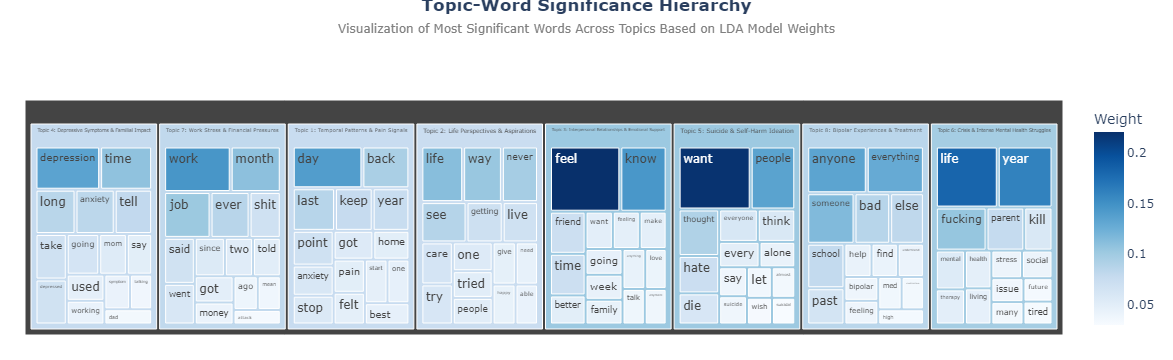

In [38]:
# 1. Create df_plot from your LDA model
top_words = 15  # Number of top words per topic to include
df_plot = pd.DataFrame(columns=['Topic', 'Word', 'Weight'])

for topic_idx, topic in enumerate(lda.components_):
    top_word_indices = topic.argsort()[-top_words:][::-1]
    topic_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]
    topic_weights = [topic[i] for i in top_word_indices]
    
    # Normalize weights to 0-1 range for better visualization
    normalized_weights = topic_weights / np.sum(topic_weights)
    
    temp_df = pd.DataFrame({
        'Topic': [f"Topic {topic_idx + 1}: {topic_labels[topic_idx]}"] * top_words,
        'Word': topic_words,
        'Weight': normalized_weights
    })
    df_plot = pd.concat([df_plot, temp_df])


fig = px.treemap(df_plot, 
                path=['Topic', 'Word'], 
                values='Weight',
                color='Weight',
                color_continuous_scale='Blues',
                title='<b>Topic-Word Significance Hierarchy</b><br><span style="font-size:12px;color:gray">Visualization of Most Significant Words Across Topics Based on LDA Model Weights</span>')

fig.update_layout(
    margin=dict(t=100, l=25, r=25, b=25),
    title_x=0.5,
    title_y=0.97
)
fig.show()

## Saving the model we have built so far and testing it with an external data

*This code is used if you want to process a simple text list, while the code after is useful if you want to process dataframe from social media souces e.g if you download data from kaggle you can load directly and get your output*

In [39]:
#TRAINING & SAVING MODELS
import re
import joblib
import contractions
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocessing function: The exact same as the one we used when we are building the LDA model
def lda_preprocess(text):
    try:
        text = contractions.fix(str(text))
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text.lower().strip()
    except:
        return 'no_text'

# SAVE THE FILE AND LDA_MODELS
if 'X' in locals() and 'lda' in locals():
    joblib.dump(vectorizer, 'mentalhealth_vectorizer.pkl')
    joblib.dump(lda, 'mentalhealth_lda.pkl')
    print("Models saved successfully!")
else:
    print("Model saving skipped due to training issues")


# LETS BUILD THE PREDICTION PIPELINE


class MentalHealthPredictor:
    def __init__(self):
        # Load trained components
        self.vectorizer = joblib.load('mentalhealth_vectorizer.pkl')
        self.lda = joblib.load('mentalhealth_lda.pkl')
        self.sia = SentimentIntensityAnalyzer()
        
        # Topic labels to use which is the same we assigned earlier on
        self.topic_labels = {
            0: "Temporal Patterns & Pain Signals",
            1: "Life Perspectives & Aspirations",
            2: "Interpersonal Relationships & Emotional Support",
            3: "Depressive Symptoms & Familial Impact",
            4: "Suicide & Self-Harm Ideation",
            5: "Crisis & Intense Mental Health Struggles",
            6: "Work Stress & Financial Pressures",
            7: "Bipolar Experiences & Treatment"
        }
    
    def predict(self, new_texts):
        """
        Process new texts and return predictions with:
        - Cleaned text
        - Sentiment score
        - Dominant topic
        - Topic label
        """
        # Preprocess
        cleaned = [lda_preprocess(text) for text in new_texts]
        
        # Get sentiment
        sentiments = [self.sia.polarity_scores(text)['compound'] for text in cleaned]
        
        # Get topics
        X_new = self.vectorizer.transform(cleaned)
        topic_probs = self.lda.transform(X_new)
        dominant_topics = topic_probs.argmax(axis=1)
        
        # Create results DataFrame
        results = pd.DataFrame({
            'original_text': new_texts,
            'cleaned_text': cleaned,
            'sentiment_score': sentiments,
            'dominant_topic': dominant_topics,
            'topic_label': [self.topic_labels[t] for t in dominant_topics]
        })
        
        return results



# lets test the files and model that we have saved to see them in action

if __name__ == "__main__":
    # Load predictor (only needs to load once)
    predictor = MentalHealthPredictor()
    
    # Example new data
    new_data = [
        "fuck shit i just hate everthing happening with my club right now, we are in the 13th position",
        "i wish i could just disappear and enter the CBN, steal some cash and appear back again",
        "The constant pressure at work is making me lose sleep",
        " i love the hope madrid have given arsenal fans over to bernabaue now to get the real beating",
        "say my name",
        "In everything you do all give thanks, if not for anything but for been alive. which is a precious gift",
        "y"
    ]
    
    # Get predictions
    predictions = predictor.predict(new_data)
    
    # Display results
    print("\nPrediction Results:")
    print(predictions[['original_text', 'sentiment_score', 'topic_label']])
    pd.DataFrame()


Models saved successfully!

Prediction Results:
                                       original_text  sentiment_score  \
0  fuck shit i just hate everthing happening with...          -0.8957   
1  i wish i could just disappear and enter the CB...          -0.3400   
2  The constant pressure at work is making me los...          -0.5994   
3   i love the hope madrid have given arsenal fan...           0.6249   
4                                        say my name           0.0000   
5  In everything you do all give thanks, if not f...           0.9354   
6                                                  y           0.0000   

                                       topic_label  
0                Work Stress & Financial Pressures  
1                     Suicide & Self-Harm Ideation  
2         Crisis & Intense Mental Health Struggles  
3  Interpersonal Relationships & Emotional Support  
4            Depressive Symptoms & Familial Impact  
5                  Life Perspectives & Aspiration

### if you want to pass in a csv file to it

### For messy real world data this code below is better, e.g maybe something from reddit or twitter or whatsapp chat or facebook


*if you want to process dataframe from social media souces e.g if you download data from kaggle you can load directly and get your output*

This code will auto detect all text column in the dataset you load and process them so for best result 

# HyBRID  model(Topic + Sentiment + classification Algorithm )

In [41]:
MH.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                   cleaned_statement  sentiment_score  \
0                                            oh gosh           0.0000   
1  trouble sleeping confused mind restless heart ...          -0.7269   
2  wrong back dear forward doubt stay restless re...          -0.7351   
3  ive shifted focus something else im still worried          -0.2960   
4                im restless restless month boy mean          -0.4939   

                                           lda_clean  dominant_topic  \
0                                            oh gosh               0   
1  trouble sleeping confused mind restless heart ...               3   
2  wrong back dear forward doubt stay restless re...               0   
3  i have shifted focus something else i am still...               7   
4              i am restless restless month boy mean               6   

                             topic_label  
0       Temporal Patterns & Pain Signals  
1  Depressive Symptoms & Familial Impact  
2       Temporal Patterns & Pain Signals  
3        Bipolar Experiences & Treatment  
4      Work Stress & Financial Pressures

In [42]:
import numpy as np
import pandas as pd

# Ensure you import the required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix


# Step 1: Extract LDA Topic Probabilities
# Using previously fitted CountVectorizer (stored as vectorizer) and LDA model (stored as lda) on the ‘lda_clean’ column.
# This will give a probability distribution for each document over the topics.
x_count = vectorizer.transform(MH['lda_cleaned_statement'])  
x_topic = lda.transform(x_count)  # Shape: (n_samples, n_topics)

# Step 2: Extract TF-IDF Features
# We use TF-IDF on the ‘lda_cleaned_statement’ column to capture the importance of words/n-grams.

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
x_tfidf = tfidf.fit_transform(MH['lda_cleaned_statement']).toarray()  # Shape: (n_samples, n_tfidf_features)

# Step 3: Retrieve Sentiment Scores
# The VADER sentiment analysis has already been applied, and scores are stored in the ‘sentiment_score’ column.
x_sentiment = MH['sentiment_score'].values.reshape(-1, 1)  # Shape: (n_samples, 1)

# ------------------------------
# Step 4: Combine All Features
# Combine LDA topic probabilities, sentiment scores, and TF-IDF features into one feature matrix.

combined_x_features = np.concatenate([x_topic, x_sentiment, x_tfidf], axis=1)


# Step 5: Define the Target variable(which is the status column)
y = MH['status']

# Step 6: Split Data into Training and Testing Sets (80-20 )
x_train, x_test, y_train, y_test = train_test_split(combined_x_features, y, test_size=0.2, random_state=42)

In [43]:
x_combined.shape

(52663, 1009)

# XGBoost Classifier

In [48]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [51]:
# for XGBoost the target column needs to be numerical so we are going to encode it

label_encoder= LabelEncoder()
y_encoded=label_encoder.fit_transform(MH['status'])

# initialize the XGBOOST model

XGB_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    scale_pos_weight='balanced',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)


#Create a seperate train_test_split for XGB because  we are encoding the status column, so it wont clash with the formal train_test_split
x_train_XGB, x_test_XGB, y_train_XGB, y_test_XGB = train_test_split(combined_x_features, y_encoded, test_size=0.2, random_state=42)

# XGBOOST MODEL TRAINING
XGB_model= XGB_model.fit( x_train_XGB, y_train_XGB,
                        eval_set=[(x_test_XGB, y_test_XGB)],
                        verbose=10 )

# MODEL EVALUATION

y_pred_XGB = label_encoder.inverse_transform(XGB_model.predict(x_test_XGB))

C:\Users\omowaye\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[23:55:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.




[0]	validation_0-mlogloss:1.87691
[10]	validation_0-mlogloss:1.45256
[20]	validation_0-mlogloss:1.23026
[30]	validation_0-mlogloss:1.09126
[40]	validation_0-mlogloss:0.99793
[50]	validation_0-mlogloss:0.93336
[60]	validation_0-mlogloss:0.88670
[70]	validation_0-mlogloss:0.85072
[80]	validation_0-mlogloss:0.82274
[90]	validation_0-mlogloss:0.80085
[100]	validation_0-mlogloss:0.78291
[110]	validation_0-mlogloss:0.76824
[120]	validation_0-mlogloss:0.75496
[130]	validation_0-mlogloss:0.74402
[140]	validation_0-mlogloss:0.73476
[150]	validation_0-mlogloss:0.72651
[160]	validation_0-mlogloss:0.71892
[170]	validation_0-mlogloss:0.71236
[180]	validation_0-mlogloss:0.70646
[190]	validation_0-mlogloss:0.70085
[200]	validation_0-mlogloss:0.69552
[210]	validation_0-mlogloss:0.69092
[220]	validation_0-mlogloss:0.68662
[230]	validation_0-mlogloss:0.68229
[240]	validation_0-mlogloss:0.67824
[250]	validation_0-mlogloss:0.67460
[260]	validation_0-mlogloss:0.67114
[270]	validation_0-mlogloss:0.66803
[28

In [53]:
# Print accuracy and classification report
print("Accuracy score for XGB is : ", accuracy_score(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB))
print('\n')
print("Precision score for XGB is :", precision_score(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB, average='macro'))
print('\n')
print("Recall score for XGB is :", recall_score(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB, average='macro'))
print('\n')
print("f1 score for XGB is :", f1_score(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB, average='macro'))
print('\n')

print("Classification Report  for XGB is :\n", classification_report(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB, target_names=label_encoder.classes_)) 

Accuracy score for XGB is :  0.7595177062565271


Precision score for XGB is : 0.7748749635760906


Recall score for XGB is : 0.6819485206117173


f1 score for XGB is : 0.718597361976194


Classification Report  for XGB is :
                       precision    recall  f1-score   support

             Anxiety       0.81      0.75      0.78       777
             Bipolar       0.87      0.73      0.79       577
          Depression       0.70      0.73      0.72      3066
              Normal       0.83      0.94      0.88      3308
Personality disorder       0.86      0.53      0.66       215
              Stress       0.67      0.46      0.55       515
            Suicidal       0.67      0.63      0.65      2075

            accuracy                           0.76     10533
           macro avg       0.77      0.68      0.72     10533
        weighted avg       0.76      0.76      0.75     10533



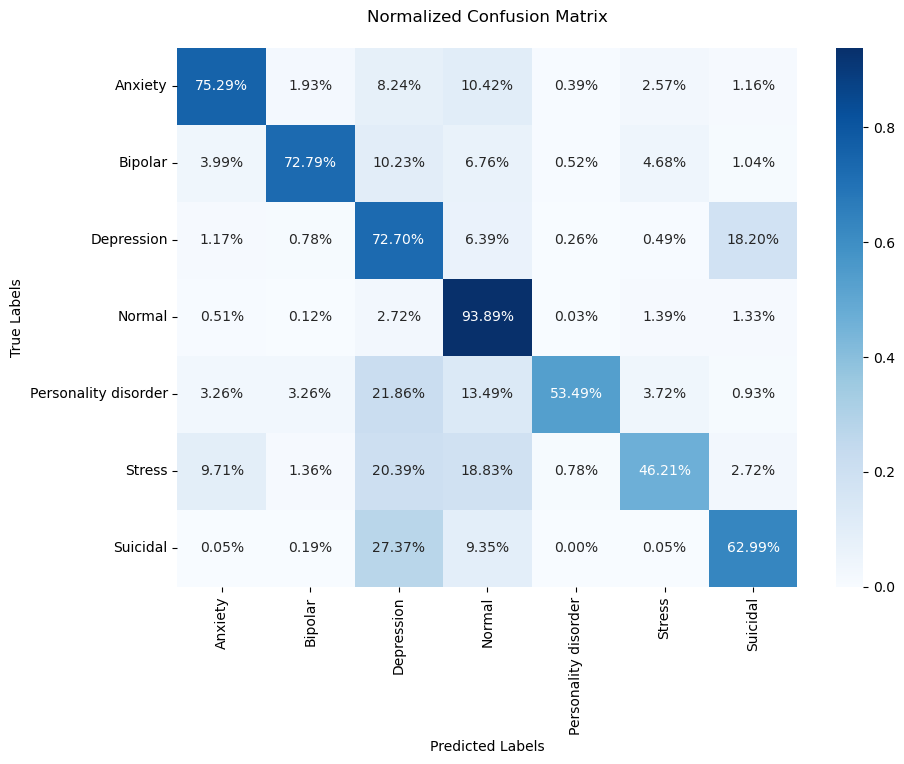

In [60]:
# Confusion matrix for XGB
plt.figure(figsize=(10,7))
sns.heatmap(
    confusion_matrix(label_encoder.inverse_transform(y_test_XGB), y_pred_XGB, normalize='true'),
    annot=True,
    fmt=".2%",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Normalized Confusion Matrix\n")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

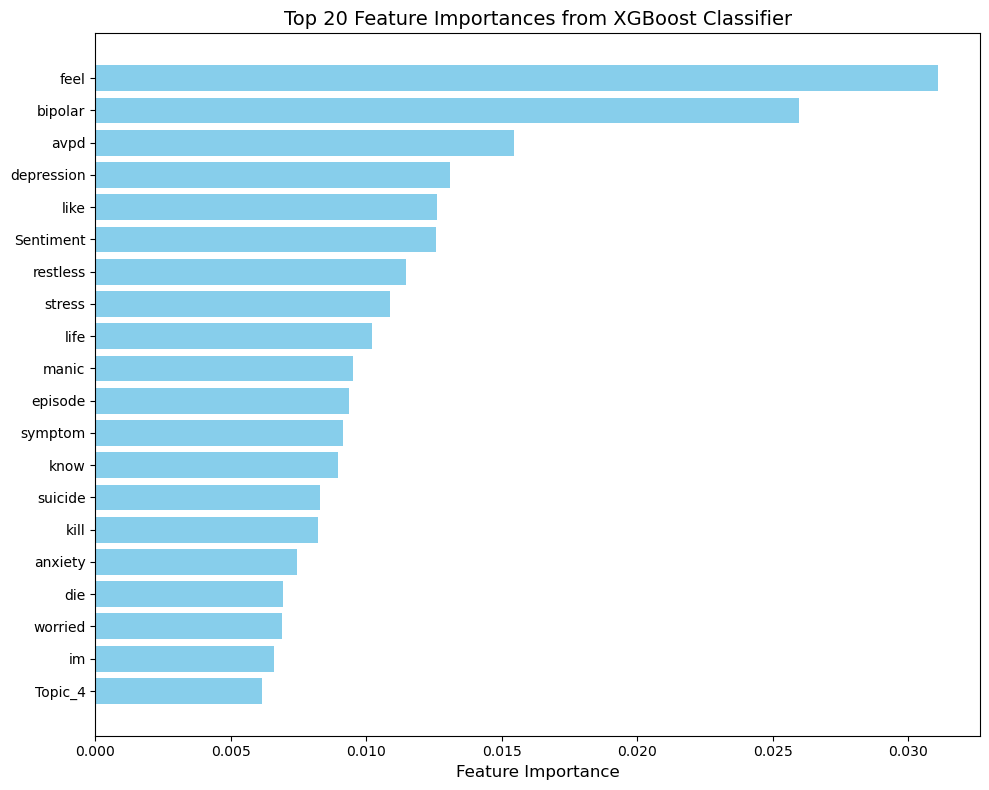

In [95]:
#feature importance

# Step 1: Define the composite feature names.
# For LDA topic probabilities:
n_topics = x_topic.shape[1]  # Should be 8 (based on your LDA n_components)
feature_names_topic = [f"Topic_{i}" for i in range(n_topics)]

# For sentiment scores:
feature_names_sentiment = ["Sentiment"]

# For TF-IDF features (using your fitted TF-IDF vectorizer, tfidf):
feature_names_tfidf = tfidf.get_feature_names_out().tolist()

# Combine all feature names into one list:
combined_feature_names = feature_names_topic + feature_names_sentiment + feature_names_tfidf

# Step 2: Get feature importances from your trained XGBoost model.
# (XGB_model is already fitted on x_train_XGB and x_test_XGB in your code.)
importances = XGB_model.feature_importances_  # This should be of length equal to len(combined_feature_names)

# Step 3: Select the top 20 features based on importance.
n_top = 20
indices = np.argsort(importances)[-n_top:][::-1]  # Get indices of the top n_top features in descending order

# Step 4: Plot the top 20 feature importances.
plt.figure(figsize=(10, 8))
plt.barh(range(n_top), importances[indices], align='center', color='skyblue')
plt.yticks(range(n_top), [combined_feature_names[i] for i in indices], fontsize=10)
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Top 20 Feature Importances from XGBoost Classifier", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis so the highest importance is at the top
plt.tight_layout()
plt.show()

### SAVE the XGB MODEL

In [ ]:
# SAVE MODEL

joblib.dump(XGB_model, 'mentalhealth_xgboost.pkl')
print("Model saved successfully!")

## support vector classifier

In [72]:
from sklearn.svm import SVC

In [103]:
SV = SVC(kernel='rbf')
SV=SV.fit(x_train, y_train)
y_pred_SV = SV.predict(x_test)

In [ ]:
# Print accuracy and detailed classification report
print("Accuracy score for SVC is : ", accuracy_score(y_test, y_pred_SV)*100)
print('\n')
print("Precision score for SVCis :", precision_score(y_test, y_pred_SV,average='macro')*100)
print('\n')
print("Recall score for SVC is :", recall_score(y_test, y_pred_SV,average='macro')*100)
print('\n')
print("f1 score for SVC is :", f1_score(y_test, y_pred_SV,average='macro')*100)
print('\n')


print("Accuracy score for SVC is : ", accuracy_score(y_test, y_pred_SV)*100)
print('\n')
print("Precision score for SVCis :", precision_score(y_test, y_pred_SV,average='weighted')*100)
print('\n')
print("Recall score for SVC is :", recall_score(y_test, y_pred_SV,average='weighted')*100)
print('\n')
print("f1 score for SVC is :", f1_score(y_test, y_pred_SV,average='weighted')*100)
print('\n')

class_names=sorted(MH['status'].unique())
print("Classification Report for SVC IS:\n", classification_report(y_test, y_pred,target_names=class_names))
print('\n')

Accuracy score for SVC is :  76.35051742143739


Precision score for SVCis : 76.9828936167314


Recall score for SVC is : 67.54366693648855


f1 score for SVC is : 71.04904366338681


Accuracy score for SVC is :  76.35051742143739


Precision score for SVCis : 76.04665740753414




## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
LR = LogisticRegression(max_iter=1000,)
LR=LR.fit(x_train, y_train)

# Step 8: Evaluate the Model
y_pred = LR.predict(x_test)

# Print accuracy and detailed classification report
print("Accuracy score for Logistic Regression is : ", accuracy_score(y_test, y_pred))
print('\n')
print("Precision score for Logistic Regression is :", precision_score(y_test, y_pred, average='weighted'))
print('\n')
print("Recall score for Logistic Regression is :", recall_score(y_test, y_pred, average='weighted'))
print('\n')
print("f1 score for Logistic Regression is :", f1_score(y_test, y_pred, average='weighted'))


class_names=sorted(MH['status'].unique())
print("Classification Report  for Logistic Regression is :\n", classification_report(y_test, y_pred))

Accuracy score for Logistic Regression is :  0.7571442134244755


Precision score for Logistic Regression is : 0.7521210221622191


Recall score for Logistic Regression is : 0.7571442134244755


f1 score for Logistic Regression is : 0.7518589291421016
Classification Report  for Logistic Regression is :
                       precision    recall  f1-score   support

             Anxiety       0.79      0.77      0.78       777
             Bipolar       0.85      0.72      0.78       577
          Depression       0.71      0.71      0.71      3066
              Normal       0.84      0.94      0.89      3308
Personality disorder       0.75      0.48      0.59       215
              Stress       0.62      0.41      0.49       515
            Suicidal       0.67      0.65      0.66      2075

            accuracy                           0.76     10533
           macro avg       0.75      0.67      0.70     10533
        weighted avg       0.75      0.76      0.75     10533



# lets save the hybrid model and test with new input to see what it will give

##### save all the trained model

In [111]:
import joblib

# Save the best performing model (XGBoost)
joblib.dump(XGB_model, 'xgb_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save the CountVectorizer used in LDA (here, variable "vectorizer")
joblib.dump(vectorizer, 'count_vectorizer.pkl')

# Save the LDA model
joblib.dump(lda, 'lda_model.pkl')

#save the label encoder
joblib.dump(label_encoder,'label_encoder.pkl')

print("All models and vectorizers have been saved successfully!")

All models and vectorizers have been saved successfully!


In [133]:
import joblib
import numpy as np
import re, contractions
from nltk.sentiment import SentimentIntensityAnalyzer

# Make sure to download the VADER lexicon if not already done:
#import nltk
#nltk.download('vader_lexicon')

def lda_preprocess(text):
    """
    Preprocess text for LDA by fixing contractions, removing non-alphabetic characters,
    converting to lowercase, and stripping whitespace.
    """
    try:
        text = contractions.fix(str(text))
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text.lower().strip()
    except Exception as e:
        return 'no_text'

class MentalHealthHybridPredictor:
    def __init__(self):
        # Load the saved models and vectorizers
        self.xgb_model = joblib.load('xgb_model.pkl')
        self.tfidf = joblib.load('tfidf_vectorizer.pkl')
        self.count_vectorizer = joblib.load('count_vectorizer.pkl')
        self.lda = joblib.load('lda_model.pkl')
        self.label_encoder = joblib.load('label_encoder.pkl')
        
        # Initialize the VADER sentiment analyzer
        self.sia = SentimentIntensityAnalyzer()
        
        # Define the topic label mapping (update if needed)
        self.topic_labels = {
            0: "Temporal Patterns & Pain Signals",
            1: "Life Perspectives & Aspirations",
            2: "Interpersonal Relationships & Emotional Support",
            3: "Depressive Symptoms & Familial Impact",
            4: "Suicide & Self-Harm Ideation",
            5: "Crisis & Intense Mental Health Struggles",
            6: "Work Stress & Financial Pressures",
            7: "Bipolar Experiences & Treatment"
        }
    
    def predict(self, new_text):
        """
        Process new input text and return a dictionary with:
         - The original text.
         - The VADER compound sentiment score.
         - The dominant LDA topic number and its corresponding topic label.
         - The predicted mental health status.
        """
        # Preprocess text for LDA
        lda_text = lda_preprocess(new_text)
        
        # Compute sentiment score using VADER
        sentiment_score = self.sia.polarity_scores(new_text)['compound']
        
        # Get LDA topic probabilities from the preprocessed text via count_vectorizer
        X_count = self.count_vectorizer.transform([lda_text])
        topic_probs = self.lda.transform(X_count)  # This returns an array of shape (1, n_topics)
        dominant_topic = topic_probs.argmax(axis=1)[0]
        topic_label = self.topic_labels.get(dominant_topic, f"Topic {dominant_topic}")
        
        # Get TF-IDF features from the (raw) new_text; if you apply additional cleaning, ensure it's consistent.
        X_tfidf = self.tfidf.transform([new_text]).toarray()  # Shape: (1, n_tfidf_features)
        
        # Combine features: LDA topic probabilities, sentiment score, and TF-IDF features
        X_combined = np.concatenate([topic_probs, [[sentiment_score]], X_tfidf], axis=1)
        
        # Predict the mental health status using the XGBoost classifier
        predicted_encoded = self.xgb_model.predict(X_combined)[0]
        predicted_status  = self.label_encoder.inverse_transform([predicted_encoded])[0]
        
        return {
            "original_text": new_text,
            "sentiment_score": sentiment_score,
            "dominant_topic": dominant_topic,
            "topic_label": topic_label,
            "predicted_status": predicted_status
        }

# Example usage:
if __name__ == "__main__":
    # Create an instance of the predictor; ensure the updated class definition is run.
    predictor = MentalHealthHybridPredictor()
    
    # Test with a sample input text
    test_text = ["I feel overwhelmed by constant stress and a lack of energy in my life.",'say my name',
                 'waooow i just feel to happy and sad, the match was interesting but villa is out of champe',
                'nrlunriugvbrubruvhrpviuehfuohfuerfghurfuyeuf',
                'i feel really really weak',
                'fuck you']
    results=[]
    for text in test_text:
        prediction = predictor.predict(text)
        '''  print("Prediction Result:")
        print(prediction)
        print("-"*150) '''
        results.append(prediction)
        df_results= pd.DataFrame(results)
print(df_results.to_string(index=False))

                                                                            original_text  sentiment_score  dominant_topic                                     topic_label predicted_status
                   I feel overwhelmed by constant stress and a lack of energy in my life.          -0.4215               0                Temporal Patterns & Pain Signals           Stress
                                                                              say my name           0.0000               3           Depressive Symptoms & Familial Impact           Normal
waooow i just feel to happy and sad, the match was interesting but villa is out of champe           0.2846               2 Interpersonal Relationships & Emotional Support           Normal
                                             nrlunriugvbrubruvhrpviuehfuohfuerfghurfuyeuf           0.0000               0                Temporal Patterns & Pain Signals           Normal
                                                            

In [134]:
results

[{'original_text': 'I feel overwhelmed by constant stress and a lack of energy in my life.',
  'sentiment_score': -0.4215,
  'dominant_topic': 0,
  'topic_label': 'Temporal Patterns & Pain Signals',
  'predicted_status': 'Stress'},
 {'original_text': 'say my name',
  'sentiment_score': 0.0,
  'dominant_topic': 3,
  'topic_label': 'Depressive Symptoms & Familial Impact',
  'predicted_status': 'Normal'},
 {'original_text': 'waooow i just feel to happy and sad, the match was interesting but villa is out of champe',
  'sentiment_score': 0.2846,
  'dominant_topic': 2,
  'topic_label': 'Interpersonal Relationships & Emotional Support',
  'predicted_status': 'Normal'},
 {'original_text': 'nrlunriugvbrubruvhrpviuehfuohfuerfghurfuyeuf',
  'sentiment_score': 0.0,
  'dominant_topic': 0,
  'topic_label': 'Temporal Patterns & Pain Signals',
  'predicted_status': 'Normal'},
 {'original_text': 'i feel really really weak',
  'sentiment_score': -0.5379,
  'dominant_topic': 2,
  'topic_label': 'Interper